Step 1.)  Import all libraries that I might want to use, and import dataset

In [1]:
import statistics as stats
import statsmodels.api as sm
import pandas as pd
import math as math
from sklearn.model_selection import train_test_split
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.metrics import r2_score

#Read in .csv file and put into dataframe
df = pd.read_csv("boston.csv")


Step 2.)  Assign predictors and target variable, separate data into test and training dataset, and add a constant to train dataset

In [2]:
#Assign predictors and target variable
X = df.drop('MV',axis=1)
Y = df['MV']

#Separate data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=42)

#Add a constant to the train data set
X_train=sm.add_constant(X_train)

C:\Users\Todd\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Step 3.)  I've already eye-balled the .csv file itself so have a good idea of what's in there.
I want to get a general idea of how response variable and predictors are related.  Will create a few plots to do this:

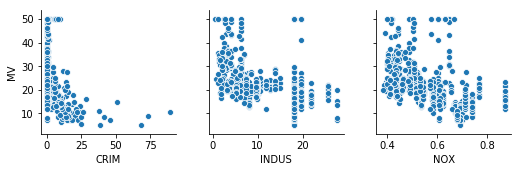

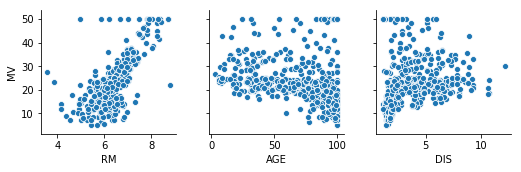

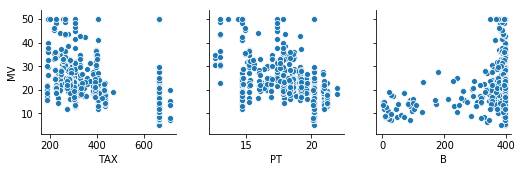

In [3]:
sns.pairplot(df, x_vars=['CRIM','INDUS','NOX'],y_vars ='MV')
sns.pairplot(df, x_vars=['RM','AGE','DIS'],y_vars ='MV')                         
sns.pairplot(df, x_vars=['TAX','PT','B'], y_vars ='MV')

Step 4.)  Let's get an initial model up and running and see what it looks like using statsmodel:

In [4]:
m1=sm.OLS(Y_train,X_train).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     93.31
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           5.46e-92
Time:                        10:01:57   Log-Likelihood:                -1244.5
No. Observations:                 404   AIC:                             2509.
Df Residuals:                     394   BIC:                             2549.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0906      5.802      1.739      0.0

Upon first look through, Adj. R-Squared is 0.673 which is good.

Looking at the individual P-values for each predictor, both INDUS and TAX values are
above .05, indicating these aren't significant predictors.  Therefore going to re-run
my dataset excluding these variables:

In [5]:
X_train = X_train.drop(['INDUS','TAX'], axis=1)

Then I'll re-fit the model and take a look at the model metrics again:

In [6]:
m2 = sm.OLS(Y_train,X_train).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     120.5
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.84e-94
Time:                        10:02:11   Log-Likelihood:                -1244.6
No. Observations:                 404   AIC:                             2505.
Df Residuals:                     396   BIC:                             2537.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9506      5.704      1.745      0.0

Looking at result summary, the Adjusted R2 went up a tiny bit(.675) which implies
removing those predictors was the right decision.  All predictor p-values 
are below .05, low P(f-statistic).  

Step 5.)  Now going to run the model and see how it looks on the TEST dataset.

First though I want to make the same manipulations to the test dataset as I did with train dataset:

In [7]:
X_test = X_test.drop(['INDUS','TAX'],axis=1)
X_test = sm.add_constant(X_test)

Then, I'll make the predictions on the test data set using final model.

In [8]:
predictions_test = m2.predict(X_test)

Step 6.)  Now I can calculate R2 on test set:

In [9]:
r2_score(Y_test,predictions_test)

0.5516545946933195

My R2 comes out to .55 on the test dataset.  This is a bit concerning is it's somewhat low.  

Step 7.)  I wanted to run some more diagnostics:

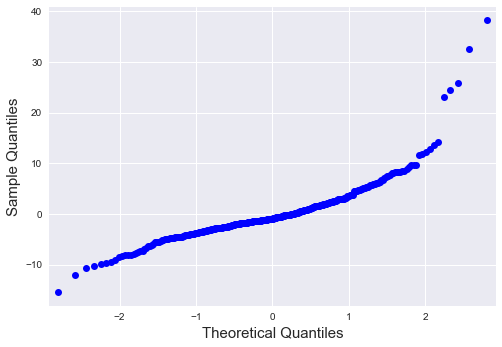

In [10]:
plt.style.use('seaborn') 
plt.rc('font', size=14) 
plt.rc('figure', titlesize=18) 
plt.rc('axes', labelsize=15) 
plt.rc('axes', titlesize=18)

res = m2.resid
fig = sm.qqplot(res)
plt.show()

One concern when doing the QQ plots is that there are a few outliers as well as a deviation from a straight diagnal line across the graph.  This may indicate that the normality assumptions are being validated by this model.  This may indicate
removing some of the outliers or maybe using a different type of model.  This could be something to revisit once I become more comfortable with different types of models to use.

